## Importing Packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as imread
import numpy as np
import os
from scipy.spatial import distance

## Loading Files from Dataset 

In [2]:
train_img_folder = 'training_image/'
test_img_folder = 'testing_image/'

train_files = os.listdir(train_img_folder)
test_files = os.listdir(test_img_folder)

width = 128
height = 128

## Printing Training Sample Images

Training Images: 


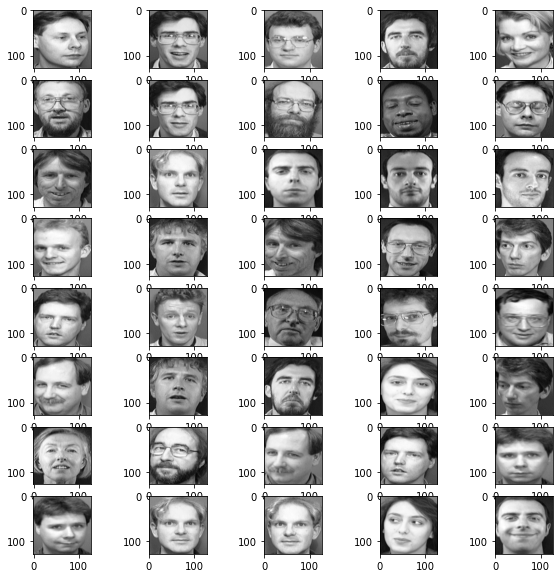

In [3]:
print("Training Images: ")
train_image_names = os.listdir(train_img_folder)
plt.figure(figsize=(10,10))
training_array = np.ndarray(shape=(len(train_image_names), height*width), dtype = np.float64)
for i in range(40):
    img = plt.imread(train_img_folder + train_image_names[i])
    training_array[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(8,5,i+1)
    plt.imshow(img,cmap = 'gray')

## Printing Testing Sample Images

Testing Images: 


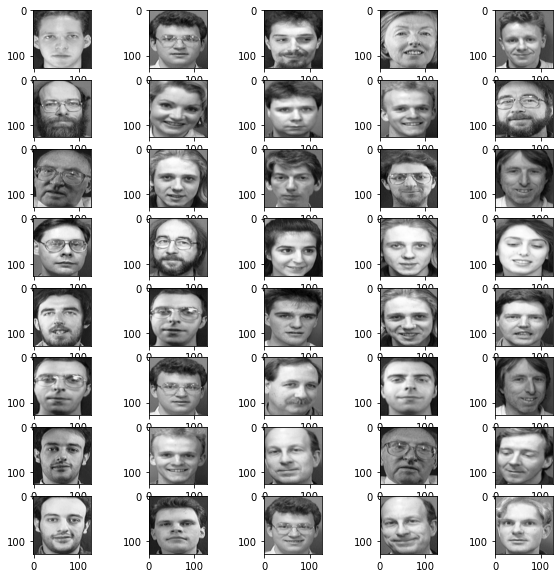

In [4]:
print("Testing Images: ")
test_image_names = os.listdir(test_img_folder)
plt.figure(figsize=(10,10))
testing_array = np.ndarray(shape=(len(test_image_names), height*width), dtype = np.float64)
for i in range(40):
    img = plt.imread(test_img_folder + test_image_names[i])
    testing_array[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(8,5,i+1)
    plt.imshow(img,cmap = 'gray')

## Generating Mean Face

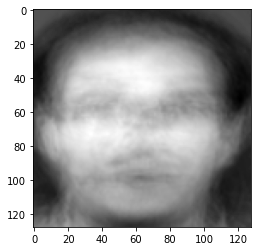

In [5]:
mean_face = np.zeros((1, width*height))
for i in training_array:
    mean_face = np.add(mean_face,i)
mean_face = np.divide(mean_face,float(len(train_image_names))).flatten()
plt.imshow(mean_face.reshape(height,width), cmap = 'gray')
plt.show()

## Performing Mean Zero Operation

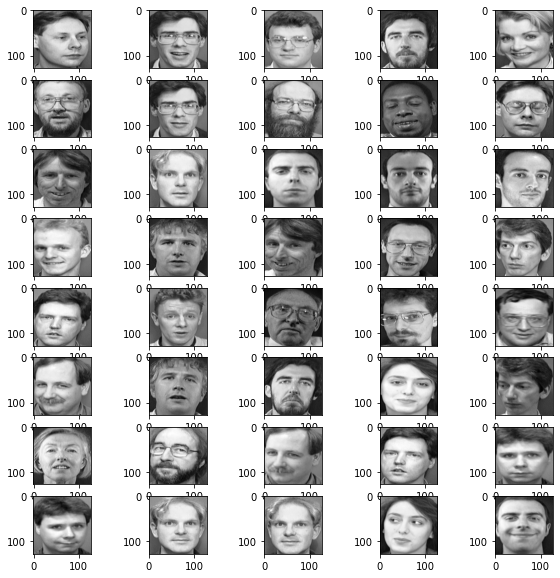

In [6]:
updated_training_array = np.ndarray(shape=(len(train_image_names), height*width))
#print(updated_training_array.shape)
#print(mean_face.shape)
for i in range(len(train_image_names)):
    updated_training_array[i] = np.subtract(training_array[i],mean_face)
#print(updated_training_array[0].shape)
plt.figure(figsize=(10,10))
for i in range(40):
    img = updated_training_array[i].reshape(height,width)
    plt.subplot(8,5,i+1)
    plt.imshow(img,cmap='gray')
plt.show()

## Calculating Covariance Matrix

In [7]:
cov_mat = np.cov(updated_training_array)
cov_mat = np.divide(cov_mat,240.0)
print(cov_mat.shape)
print(cov_mat)

(240, 240)
[[ 1.31130668e-04  1.00492043e-04  4.58064263e-05 ... -1.04786114e-05
  -1.04786114e-05 -1.04786114e-05]
 [ 1.00492043e-04  1.75690769e-04  5.22760993e-05 ... -1.15069589e-05
  -1.15069589e-05 -1.15069589e-05]
 [ 4.58064263e-05  5.22760993e-05  1.05662089e-04 ... -6.39959515e-06
  -6.39959515e-06 -6.39959515e-06]
 ...
 [-1.04786114e-05 -1.15069589e-05 -6.39959515e-06 ...  1.80814357e-06
   1.80814357e-06  1.80814357e-06]
 [-1.04786114e-05 -1.15069589e-05 -6.39959515e-06 ...  1.80814357e-06
   1.80814357e-06  1.80814357e-06]
 [-1.04786114e-05 -1.15069589e-05 -6.39959515e-06 ...  1.80814357e-06
   1.80814357e-06  1.80814357e-06]]


## Calculating Eigen Values and Eigen Vectors

In [8]:
eVal, eVec = np.linalg.eig(cov_mat)
eVal = np.real(eVal)
eVec = np.real(eVec)
# print(eVal)
# print(eVec)

## Sorting Eigen Values and Eigen Vectors

In [9]:
eig_com = [(eVal[index], eVec[index]) for index in range(len(eVal))]

#eig_com.sort(reverse = True)

eVal_sort = [eig_com[index][0] for index in range(len(eVal))]
eVec_sort = [eig_com[index][1] for index in range(len(eVal))]

sort_index = sorted(range(eVal.shape[0]), key = lambda k: eVal[k], reverse = True)

eVal_sort = eVal[sort_index]
eVec_sort = eVec[sort_index]

#print(eVec_sort)
train_files_sort = np.array(train_files)[sort_index]

## Reducing Eigen Vectors

In [10]:
reduced = np.array(eVec_sort[:240]).transpose()
reduced.shape

(240, 240)

In [11]:
print(training_array.transpose().shape, reduced.shape)

(16384, 240) (240, 240)


In [12]:
projected_data = np.dot(training_array.transpose(), reduced)
projected_data = (projected_data.transpose())
projected_data.shape


(240, 16384)

## Printing Eigen Faces

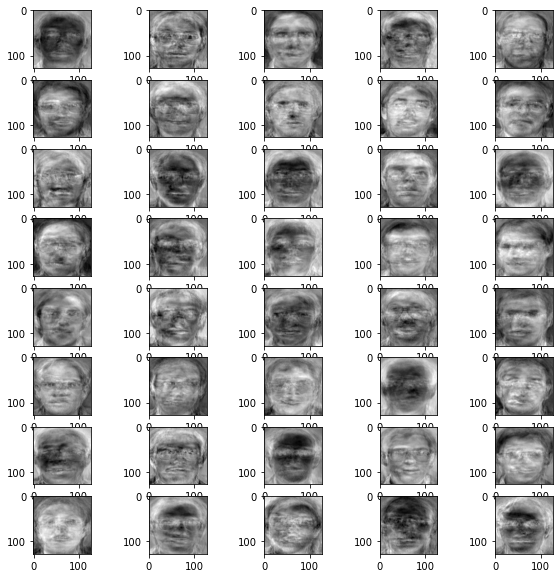

(240, 16384)


In [13]:
plt.figure(figsize=(10,10))
for i in range(40):
    img = projected_data[i].reshape(height,width)
    plt.subplot(8,5,i+1)
    plt.imshow(img, cmap = 'gray')
plt.show()
print(projected_data.shape)

## Generating Output

In [14]:
trainArr = []
testArr = []
training_array = np.array(training_array)
#print(training_array)
testing_array = np.array(testing_array)
#print(testing_array)
#print((testing_array).shape)
#training_arr_1 = training_array[:]
for i in range(1,160):
    d = []
    for j in range(1,240):
        d.append(distance.euclidean(testing_array[i], projected_data[j]))
    idx = d.index(min(d))
    #print(d)
    testArr.append(i)
    trainArr.append(idx)
    print("Test Image: " + str(i) + " ---> Matches with ---> Train Image: " +str(idx))

Test Image: 1 ---> Matches with ---> Train Image: 25
Test Image: 2 ---> Matches with ---> Train Image: 28
Test Image: 3 ---> Matches with ---> Train Image: 34
Test Image: 4 ---> Matches with ---> Train Image: 4
Test Image: 5 ---> Matches with ---> Train Image: 24
Test Image: 6 ---> Matches with ---> Train Image: 24
Test Image: 7 ---> Matches with ---> Train Image: 28
Test Image: 8 ---> Matches with ---> Train Image: 25
Test Image: 9 ---> Matches with ---> Train Image: 28
Test Image: 10 ---> Matches with ---> Train Image: 12
Test Image: 11 ---> Matches with ---> Train Image: 24
Test Image: 12 ---> Matches with ---> Train Image: 7
Test Image: 13 ---> Matches with ---> Train Image: 28
Test Image: 14 ---> Matches with ---> Train Image: 3
Test Image: 15 ---> Matches with ---> Train Image: 25
Test Image: 16 ---> Matches with ---> Train Image: 24
Test Image: 17 ---> Matches with ---> Train Image: 28
Test Image: 18 ---> Matches with ---> Train Image: 34
Test Image: 19 ---> Matches with ---> Tr

Test Image: 159 ---> Matches with ---> Train Image: 238


## Eigen Value Mapping

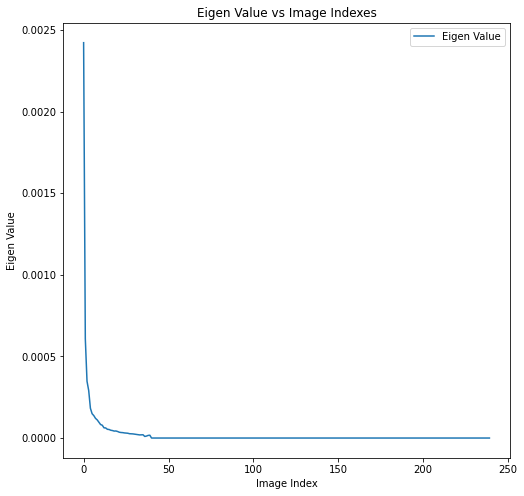

In [15]:
eValNum = list(range(0,240))
plt.figure(figsize=(8,8))
plt.plot(eValNum, eVal)
plt.xlabel('Image Index')
plt.ylabel('Eigen Value')
plt.title('Eigen Value vs Image Indexes')
plt.legend(['Eigen Value'])
plt.show()